In [9]:
import pandas as pd
import numpy as np
data=pd.read_excel("Bupa1.xlsx")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   345 non-null    int64  
 1   F1      345 non-null    int64  
 2   F2      345 non-null    int64  
 3   F3      345 non-null    int64  
 4   F4      345 non-null    int64  
 5   F5      345 non-null    int64  
 6   F6      345 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 19.0 KB


In [61]:
data.Class.value_counts()
# number of samples for True/False are > 33% of total samples , so there is no need to unsampling the data

1    200
0    145
Name: Class, dtype: int64

In [62]:
X_features=list(data.columns)
X_features.remove('Class')
X_features

['F1', 'F2', 'F3', 'F4', 'F5', 'F6']

In [63]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
Y=data.Class
X=data[['F1', 'F2', 'F3', 'F4', 'F5', 'F6']]
X=sm.add_constant(X)

train_X,test_X,train_y,test_y=train_test_split(X,Y,test_size=0.3,random_state=42)

In [64]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knn_clf= KNeighborsClassifier()
knn_clf.fit(train_X,train_y)

KNeighborsClassifier()

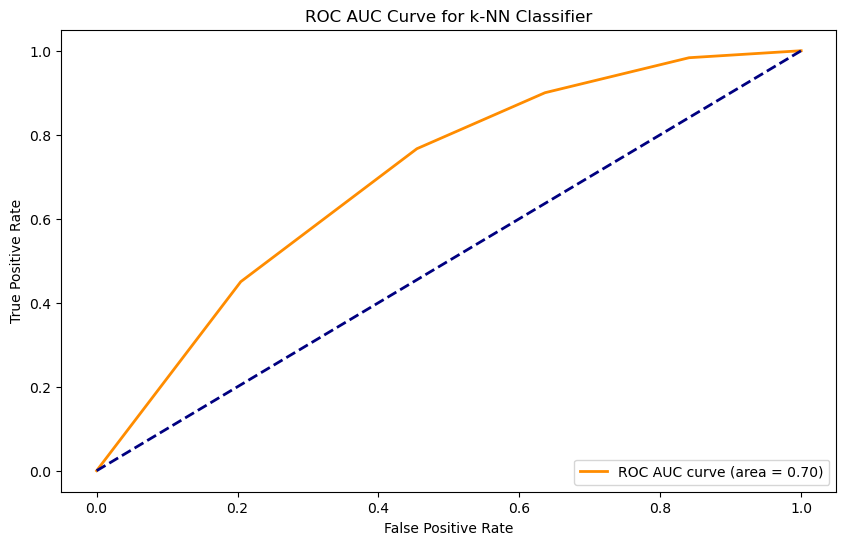

In [65]:
# ROC AUC curve for KNN classifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
scores_y = knn_clf.predict_proba(test_X)[:, 1]
fpr,tpr, _=roc_curve(test_y,scores_y)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC AUC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve for k-NN Classifier')
plt.legend(loc='lower right')
plt.show()

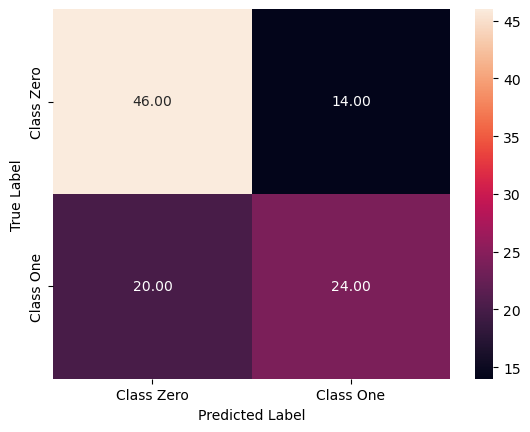

In [66]:
pred_y = knn_clf.predict(test_X)
from sklearn import metrics
import seaborn as sn
def draw_cm( actual, predicted):
    cm = metrics.confusion_matrix(actual,predicted,labels = [1,0])
    sn.heatmap(cm, annot = True, fmt = '.2f',xticklabels = ["Class Zero","Class One"],yticklabels = ["Class Zero","Class One"])
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
draw_cm(test_y,pred_y)

In [67]:
print(metrics.classification_report(test_y,pred_y))

              precision    recall  f1-score   support

           0       0.63      0.55      0.59        44
           1       0.70      0.77      0.73        60

    accuracy                           0.67       104
   macro avg       0.66      0.66      0.66       104
weighted avg       0.67      0.67      0.67       104



In [68]:
from sklearn.model_selection import GridSearchCV
tuned_parameters=[{'n_neighbors': range(5,10),'metric': ['canberra', 'euclidean','minkowski']}]
clf = GridSearchCV(KNeighborsClassifier(),tuned_parameters,cv=10,scoring='roc_auc')
clf.fit(train_X,train_y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid=[{'metric': ['canberra', 'euclidean', 'minkowski'],
                          'n_neighbors': range(5, 10)}],
             scoring='roc_auc')

In [69]:
clf.best_score_

0.6919155844155844

In [70]:
clf.best_params_

{'metric': 'euclidean', 'n_neighbors': 7}

In [33]:
clf.cv_results_

{'mean_fit_time': array([0.00634995, 0.00620501, 0.00468915, 0.00180638, 0.00469761,
        0.00693171, 0.0045341 , 0.00601721, 0.00554631, 0.00509291,
        0.00469289, 0.00375178, 0.0056766 , 0.00475242, 0.00208259]),
 'std_fit_time': array([0.0065128 , 0.00721054, 0.00716279, 0.00287523, 0.00647397,
        0.00733889, 0.00626607, 0.00582496, 0.00622938, 0.00665666,
        0.00716853, 0.00388731, 0.00717658, 0.00644568, 0.00480491]),
 'mean_score_time': array([0.01298604, 0.00627522, 0.00786955, 0.01109226, 0.00899863,
        0.00482688, 0.00907836, 0.00605979, 0.00779366, 0.00816231,
        0.00631645, 0.00696042, 0.0069643 , 0.00940859, 0.01364012]),
 'std_score_time': array([0.00600612, 0.00678513, 0.00787103, 0.00529441, 0.00679474,
        0.00669031, 0.0074922 , 0.00456606, 0.0050895 , 0.00779431,
        0.0078218 , 0.00546924, 0.00743658, 0.00771936, 0.00476167]),
 'param_metric': masked_array(data=['canberra', 'canberra', 'canberra', 'canberra',
                    'c

In [71]:
# random forest Classifier

from sklearn.ensemble import RandomForestClassifier
radm_clf=RandomForestClassifier(max_depth=10,n_estimators=10)
radm_clf.fit(train_X,train_y)

RandomForestClassifier(max_depth=10, n_estimators=10)

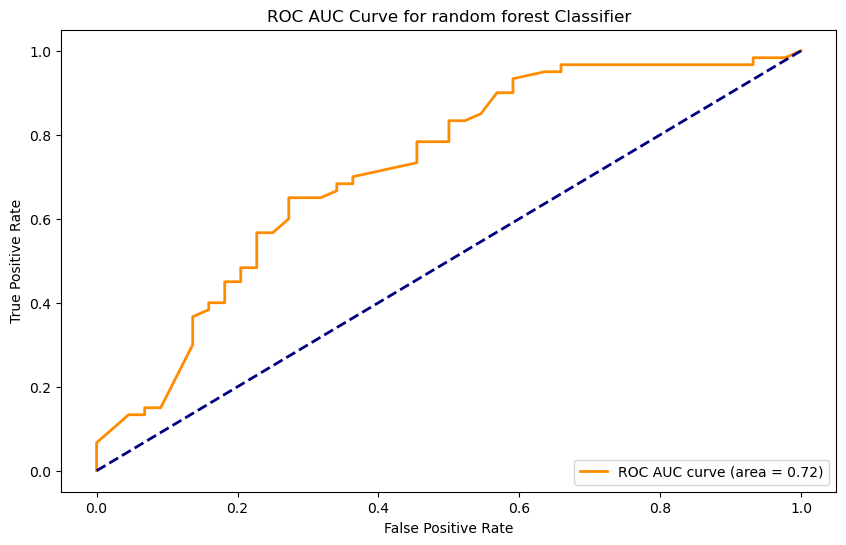

In [72]:
# ROC AUC curve for KNN classifier
scores_y = radm_clf.predict_proba(test_X)[:, 1]
fpr,tpr, _=roc_curve(test_y,scores_y)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC AUC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve for random forest Classifier')
plt.legend(loc='lower right')
plt.show()

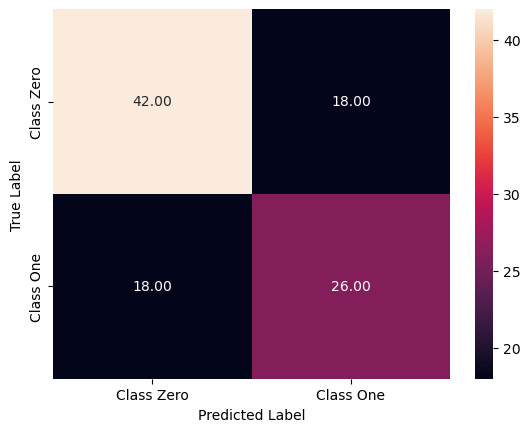

In [36]:
pred_y = radm_clf.predict(test_X)
from sklearn import metrics
import seaborn as sn
def draw_cm( actual, predicted):
    cm = metrics.confusion_matrix(actual,predicted,labels = [1,0])
    sn.heatmap(cm, annot = True, fmt = '.2f',xticklabels = ["Class Zero","Class One"],yticklabels = ["Class Zero","Class One"])
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
draw_cm(test_y,pred_y)

In [37]:
print(metrics.classification_report(test_y,pred_y))

              precision    recall  f1-score   support

           0       0.59      0.59      0.59        44
           1       0.70      0.70      0.70        60

    accuracy                           0.65       104
   macro avg       0.65      0.65      0.65       104
weighted avg       0.65      0.65      0.65       104



In [58]:
#Adaboost Classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
logreg_clf=LogisticRegression()
ada_clf=AdaBoostClassifier(logreg_clf,n_estimators=50)
ada_clf.fit(train_X,train_y)

AdaBoostClassifier(estimator=LogisticRegression())

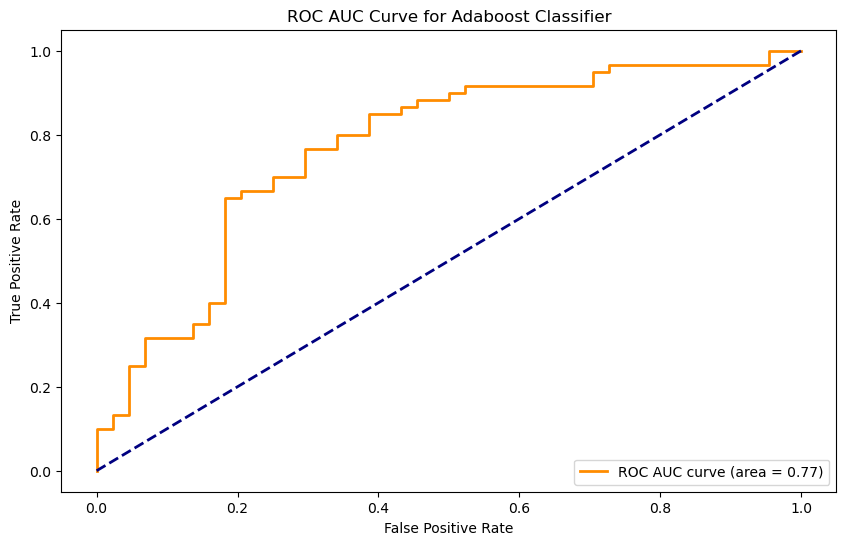

In [52]:
scores_y = ada_clf.predict_proba(test_X)[:, 1]
fpr,tpr, _=roc_curve(test_y,scores_y)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC AUC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve for Adaboost Classifier')
plt.legend(loc='lower right')
plt.show()

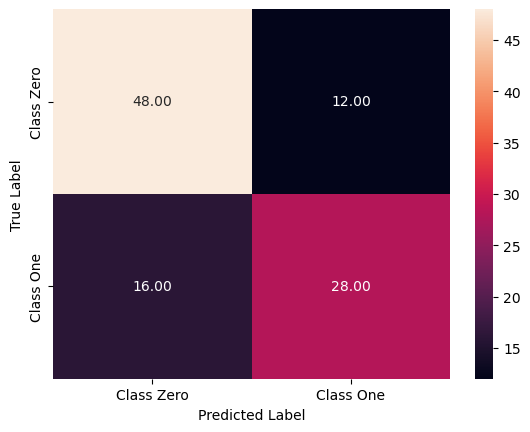

In [46]:
pred_y = ada_clf.predict(test_X)
from sklearn import metrics
import seaborn as sn
def draw_cm( actual, predicted):
    cm = metrics.confusion_matrix(actual,predicted,labels = [1,0])
    sn.heatmap(cm, annot = True, fmt = '.2f',xticklabels = ["Class Zero","Class One"],yticklabels = ["Class Zero","Class One"])
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
draw_cm(test_y,pred_y)

In [47]:
print(metrics.classification_report(test_y,pred_y))

              precision    recall  f1-score   support

           0       0.70      0.64      0.67        44
           1       0.75      0.80      0.77        60

    accuracy                           0.73       104
   macro avg       0.72      0.72      0.72       104
weighted avg       0.73      0.73      0.73       104



In [48]:
#SVM
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(train_X, train_y)


SVC(kernel='linear', random_state=42)

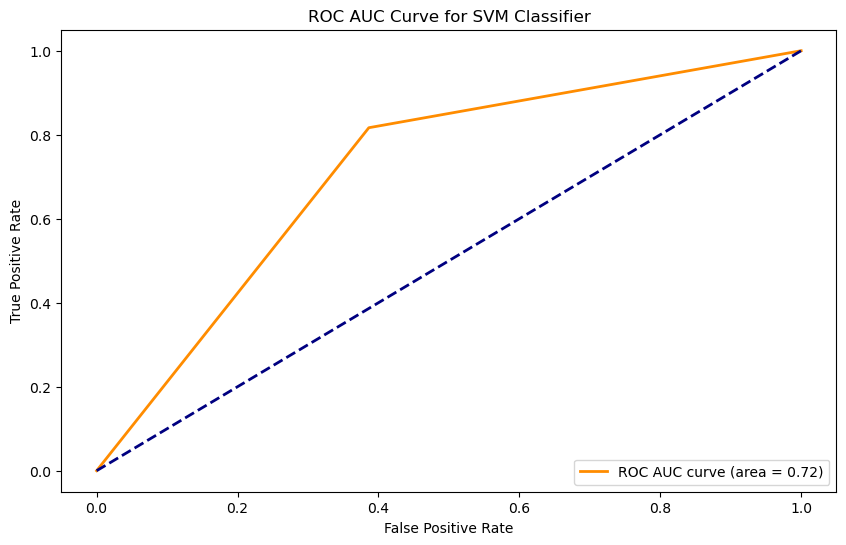

In [51]:
scores_y = svm_classifier.predict(test_X)
fpr,tpr, _=roc_curve(test_y,scores_y)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC AUC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve for SVM Classifier')
plt.legend(loc='lower right')
plt.show()

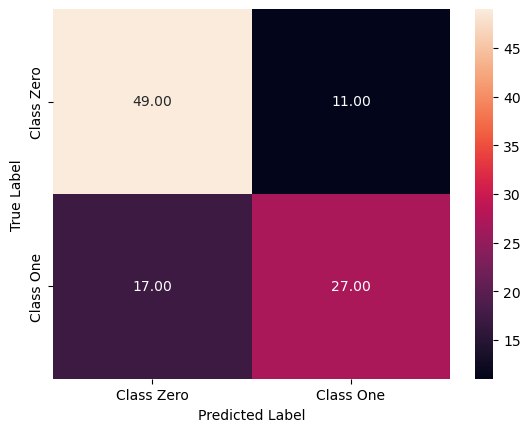

In [54]:
pred_y = svm_classifier.predict(test_X)
from sklearn import metrics
import seaborn as sn
def draw_cm( actual, predicted):
    cm = metrics.confusion_matrix(actual,predicted,labels = [1,0])
    sn.heatmap(cm, annot = True, fmt = '.2f',xticklabels = ["Class Zero","Class One"],yticklabels = ["Class Zero","Class One"])
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
draw_cm(test_y,pred_y)

In [55]:
print(metrics.classification_report(test_y,pred_y))

              precision    recall  f1-score   support

           0       0.71      0.61      0.66        44
           1       0.74      0.82      0.78        60

    accuracy                           0.73       104
   macro avg       0.73      0.72      0.72       104
weighted avg       0.73      0.73      0.73       104

